# Set you GeoIP.dat here

In [51]:
from collections import Counter

import pandas as pd
import GeoIP
import seaborn as sns
from matplotlib import pyplot

gi = GeoIP.open("/usr/local/var/GeoIP/GeoIPCity.dat", GeoIP.GEOIP_STANDARD)

# List your IPs here

In [4]:
with open('/tmp/ips') as f:
    ips = [x.strip().replace('\"','') for x in f]

# See Results

In [5]:
country_counter = Counter()
city_counter = Counter()

for ip in ips:
    gir = gi.record_by_name(ip)
    if gir is not None:
        country_counter[gir['country_name']] += 1
        city_counter['{0}, {1}'.format(gir['city'], gir['country_name'])] += 1

In [22]:
countries = pd.DataFrame.from_dict(country_counter, orient='index')
cities = pd.DataFrame.from_dict(city_counter, orient='index')

In [28]:
countries

,0
Singapore,147
Russian Federation,1788
United Kingdom,232
Poland,397
Hong Kong,35
Italy,360
Canada,153
Lebanon,10
United States,1129
Mexico,84


# Count Plot

In [29]:
countries = []
cities = []

for ip in ips:
    gir = gi.record_by_name(ip)
    if gir is not None:
        countries.append(gir['country_name'])
        cities.append('{0}, {1}'.format(gir['city'], gir['country_name']))

In [33]:
countries_df = pd.DataFrame({'country':countries})

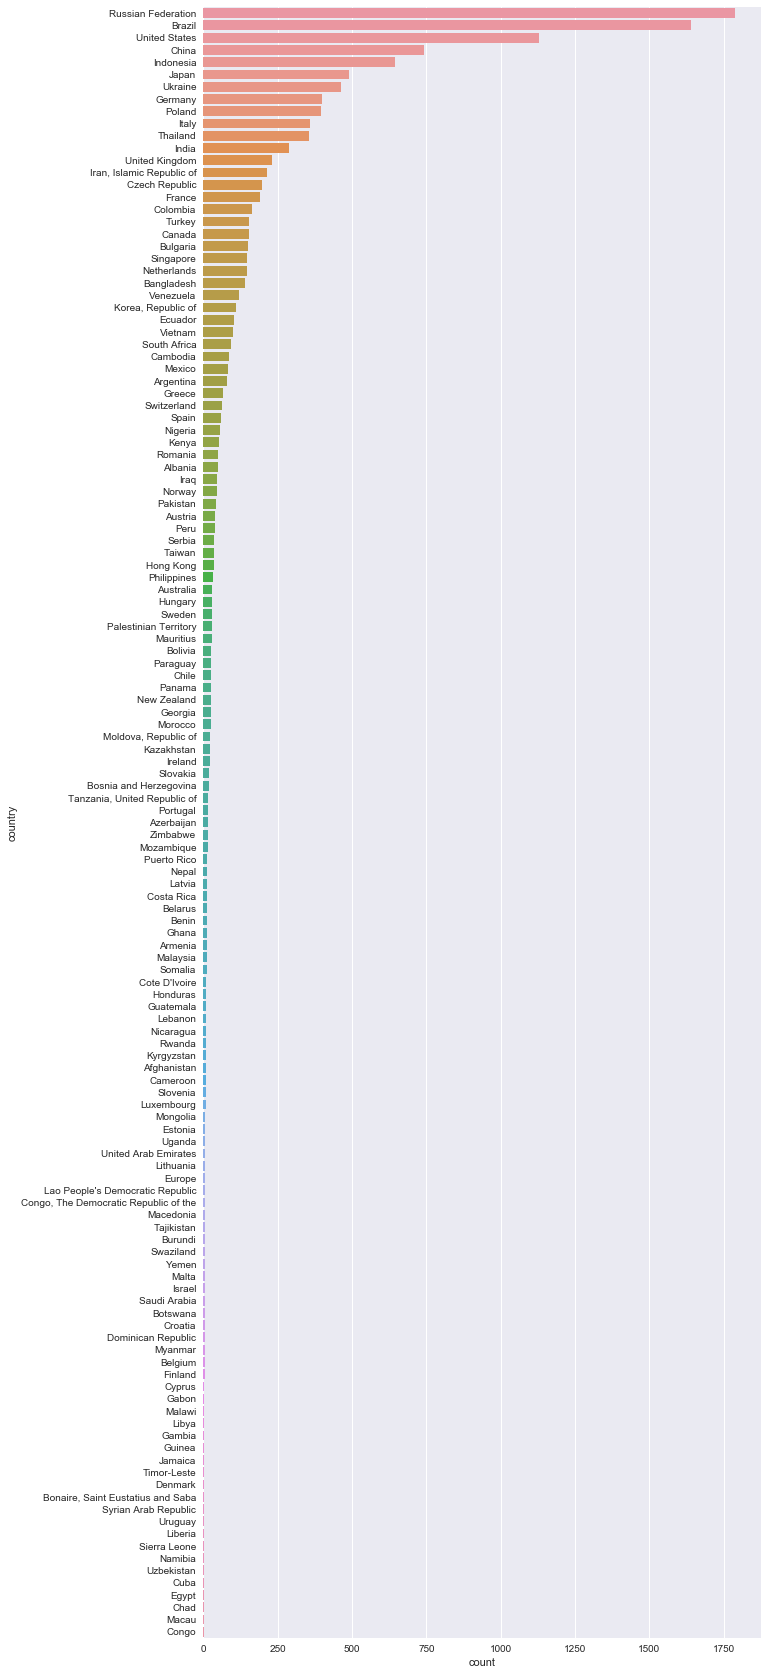

In [47]:
fig, ax = pyplot.subplots(figsize=(10, 30))
sns.set(style="darkgrid")
ax = sns.countplot(y="country", 
                   data=countries_df,
                   orient='h',
                   order = countries_df['country'].value_counts().index)